# ClusterAI 2020
# Ciencia de Datos - Ingeniería Industrial - UTN BA

### Ejercicio de Regresión. Práctica para la clase 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import mean_squared_error

### Cargo el Dataset, y realizo una primer visualización de los datos


In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1001-875D

 Directory of C:\Users\60065215\Desktop\Facultad\Ciencia de Datos\clase_07

10/16/2020  10:51 PM    <DIR>          .
10/16/2020  10:51 PM    <DIR>          ..
10/15/2020  04:39 PM    <DIR>          .ipynb_checkpoints
10/09/2020  10:15 PM             2,408 clusterai_2020_clase07_clustering_asignacion_properati.ipynb
10/15/2020  07:43 PM           292,448 clusterai_2020_clase07_clustering_credit.ipynb
10/14/2020  08:46 PM           394,600 clusterai_2020_clase07_clustering_vinos.ipynb
10/09/2020  09:39 PM           902,879 clusterai_2020_clase07_dataset_credit.csv
10/09/2020  09:39 PM         2,969,024 clusterai_2020_clase07_dataset_properati_caba.csv
10/09/2020  10:15 PM         1,537,377 clusterai_2020_clase07_presentacion.pdf
10/16/2020  10:51 PM             9,148 clusterai_2020_ejercicio_Regresion.ipynb
10/17/2019  10:52 AM            10,782 wine.data
10/17/2019  10:47 AM             3,036 wine.names
10/15/2020  04:08 PM   

In [3]:
df = pd.read_csv("Xy_train.csv")
df_test = pd.read_csv("X_test.csv")

In [4]:
df.shape

(100, 2)

In [5]:
df_test.shape

(20, 1)

In [6]:
df

,X,y
0,2.273360,6.054685
1,3.167583,4.581428
2,7.973655,5.392507
3,6.762547,3.108068
4,3.911096,4.225744
...,...,...
95,3.787495,5.133706
96,2.759471,4.308327
97,9.661041,11.923565
98,0.582026,1.335725


In [7]:
df_test

,X
0,6.170800
1,6.302022
2,8.689293
3,2.376897
4,2.707320
5,6.555949
6,8.492565
7,0.111064
8,9.121449
9,2.675377


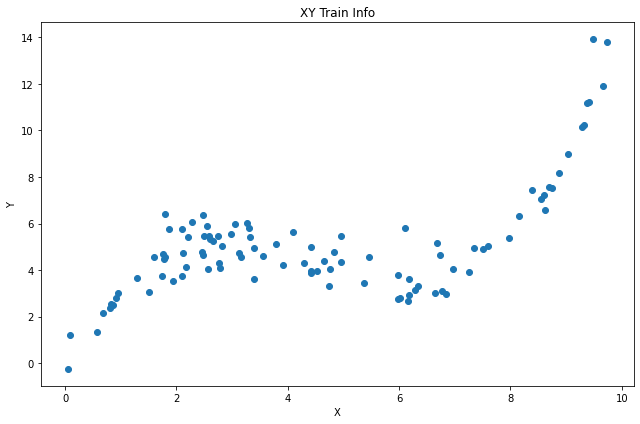

In [8]:
plt.figure(figsize=(9,6))
plt.scatter(x = df.iloc[:,0], y = df.iloc[:,1] )    
plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY Train Info')
plt.tight_layout()
plt.show(block=True)

In [9]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador
results_df = pd.DataFrame(columns=['Model','MSE'])

### Linear Regression

In [10]:
x1_train = df[["X"]]
y1_train = df[["y"]]

In [11]:
#Calculo la regresión lineal
regr = LinearRegression()
regr.fit(x1_train,y1_train)

LinearRegression()

In [12]:
#Hago la predicción
y_pred = regr.predict(x1_train)

In [13]:
#Calculo el error
linear_mse = mean_squared_error(y_true = y1_train, y_pred = y_pred)
linear_mse

3.48144471797341

MSE: 3.481445


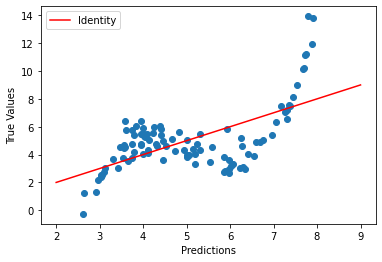

In [14]:
#Vamos a plotear Predictions vs True values
plt.scatter(y_pred, y1_train)
plt.plot(np.arange(2,10),np.arange(2,10), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'MSE: {linear_mse:.6f}')

In [15]:
# Uso el dataset de test para predecir las los valores.
y_pred_test = regr.predict(df_test)
y_pred_test

array([[5.96759494],
       [6.03934112],
       [7.34459198],
       [3.89326209],
       [4.07392204],
       [6.17817658],
       [7.23702974],
       [2.6544078 ],
       [7.5808747 ],
       [4.05645739],
       [4.3667152 ],
       [6.10182228],
       [7.60127901],
       [2.95434962],
       [5.15379446],
       [7.02760273],
       [5.30666086],
       [5.88178477],
       [6.50265793],
       [6.02722072]])

In [16]:
#Guardo los resultados en mi dataframe de resultados.
results_df = results_df.append({'Model':'Linear Classic',
                                'MSE':linear_mse,},ignore_index=True)

##### Tal cual se suponia aplicar una regresión lineal pura da un resultado muy malo, ya que los valores no tienen una distribución lineal.

### Polynomial Features

In [17]:
#df_poly = pd.DataFrame(columns=['X0','X','Y','X3','X4','X5'])

In [18]:
grad_poly = 4
poly = PolynomialFeatures(grad_poly).fit_transform(x1_train)
poly.shape

(100, 5)

In [19]:
df_poly = pd.DataFrame (poly, columns=['X0','X','X2','X3','X4'])

In [20]:
df_poly

,X0,X,X2,X3,X4
0,1.0,2.273360,5.168167,11.749105,26.709947
1,1.0,3.167583,10.033585,31.782216,100.672819
2,1.0,7.973655,63.579167,506.958318,4042.310509
3,1.0,6.762547,45.732038,309.265043,2091.419297
4,1.0,3.911096,15.296668,59.826730,233.988054
...,...,...,...,...,...
95,1.0,3.787495,14.345118,54.332062,205.782410
96,1.0,2.759471,7.614679,21.012485,57.983339
97,1.0,9.661041,93.335715,901.720178,8711.555692
98,1.0,0.582026,0.338754,0.197164,0.114754


### Linear Regression con Polynomial Features

In [23]:
#x2_train = df_poly.iloc[:, 0:5].values
#y2_train = df_poly.iloc[:,5].values
print(df_poly.shape,y1_train.shape)

(100, 5) (100, 1)


In [24]:
#y2_train

In [25]:
#Calculo la regresión lineal
regr2 = LinearRegression()
regr2.fit(df_poly,y1_train)

LinearRegression()

In [26]:
#Hago la predicción
y2_pred = regr2.predict(df_poly)

In [27]:
#Calculo el error
linear_mse2 = mean_squared_error(y_true = y1_train, y_pred = y2_pred)
linear_mse2

0.5252703884848784

MSE: 0.525270


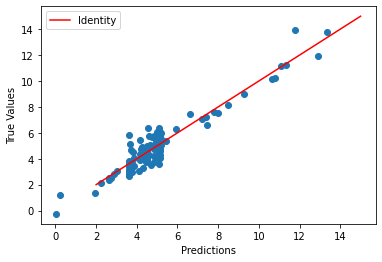

In [28]:
#Vamos a plotear Predictions vs True values
plt.scatter(y2_pred, y1_train)
plt.plot(np.arange(2,16),np.arange(2,16), 'r', label='Identity') #Linea identidad
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'MSE: {linear_mse2:.6f}')

In [29]:
grad_poly = 4
df_test_poly = PolynomialFeatures(grad_poly).fit_transform(df_test)
df_test_poly

array([[1.00000000e+00, 6.17080018e+00, 3.80787749e+01, 2.34976511e+02,
        1.44999310e+03],
       [1.00000000e+00, 6.30202215e+00, 3.97154832e+01, 2.50287855e+02,
        1.57731961e+03],
       [1.00000000e+00, 8.68929334e+00, 7.55038188e+01, 6.56074830e+02,
        5.70082665e+03],
       [1.00000000e+00, 2.37689724e+00, 5.64964051e+00, 1.34286150e+01,
        3.19184379e+01],
       [1.00000000e+00, 2.70731977e+00, 7.32958036e+00, 1.98435178e+01,
        5.37227482e+01],
       [1.00000000e+00, 6.55594874e+00, 4.29804638e+01, 2.81777718e+02,
        1.84732027e+03],
       [1.00000000e+00, 8.49256470e+00, 7.21236552e+01, 6.12514808e+02,
        5.20182164e+03],
       [1.00000000e+00, 1.11063719e-01, 1.23351496e-02, 1.36998758e-03,
        1.52155915e-04],
       [1.00000000e+00, 9.12144853e+00, 8.32008234e+01, 7.58912028e+02,
        6.92237701e+03],
       [1.00000000e+00, 2.67537737e+00, 7.15764408e+00, 1.91493990e+01,
        5.12318688e+01],
       [1.00000000e+00, 3.2428

In [30]:
# Uso el dataset de test para predecir las los valores.
y_pred_test2 = regr2.predict(df_test_poly)
y_pred_test2

array([[3.59331489],
       [3.59197997],
       [7.72926141],
       [5.03080929],
       [5.14889381],
       [3.63593294],
       [6.98549063],
       [0.28137654],
       [9.70080574],
       [5.14215494],
       [5.13251616],
       [3.60378361],
       [9.89415672],
       [2.1908104 ],
       [4.32626926],
       [5.78810546],
       [4.12985317],
       [3.61404955],
       [4.02665992],
       [3.59112029]])

In [31]:
#Guardo los resultados en mi dataframe de resultados.
results_df = results_df.append({'Model':'Linear Polynomial Features',
                                'MSE':linear_mse2,},ignore_index=True)

In [32]:
results_df

,Model,MSE
0,Linear Classic,3.481445
1,Linear Polynomial Features,0.525270


### Support Vector Regression

### Linear Features

In [34]:
n_folds = 4
# Ahora cambiamos el estimador, usaremos SVR
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.01, 0.1,1, 10,100]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [35]:
# Entrenamos
gs.fit(x1_train, y1_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=3)]: Done 720 out of 720 | elapsed:    8.2s finished
C:\Users\60065215\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=4, estimator=SVR(max_iter=25000), n_jobs=3,
             param_grid={'C': [1000, 1500, 2000, 3000, 5000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [36]:
print(gs.best_params_, "\n")

{'C': 1500, 'epsilon': 0.1, 'gamma': 0.01} 



In [38]:
# Prediccion + Metricas
svr_prediction = gs.best_estimator_.predict(x1_train)
svr_mse = mean_squared_error(y_true=y1_train, y_pred=svr_prediction)

MSE: 0.574032


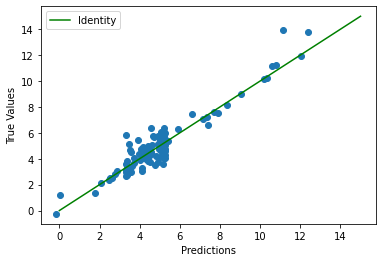

In [39]:
plt.scatter(svr_prediction, y1_train)
plt.plot(np.arange(0,16),np.arange(0,16), 'g', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'MSE: {svr_mse:.6f}')

In [40]:
results_df = results_df.append({'Model':'SVR Linear',
                                'MSE':svr_mse},ignore_index=True)

In [41]:
results_df

,Model,MSE
0,Linear Classic,3.481445
1,Linear Polynomial Features,0.525270
2,SVR Linear,0.574032


In [42]:
# Uso el dataset de test para predecir las los valores.
y_pred_test3 = gs.best_estimator_.predict(df_test)
y_pred_test3

array([3.33401181, 3.34121545, 7.66287572, 5.13365629, 5.26006932,
       3.41022722, 6.96377566, 0.08464574, 9.4221957 , 5.25342106,
       5.21500279, 3.36295688, 9.58826316, 2.02970181, 4.17734231,
       5.78787146, 3.93650109, 3.3487225 , 3.89305857, 3.33869411])

### Polynomial Features

In [63]:
# Ahora cambiamos el estimador, usaremos SVR
est2 = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters2 = {'C' : [1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.002, 0.003,0.004, 0.005]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs2 = GridSearchCV(est2, param_grid=parameters2,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [64]:
# Entrenamos
gs2.fit(df_poly, y1_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 106 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done 600 out of 600 | elapsed:    4.8s finished
C:\Users\60065215\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=4, estimator=SVR(max_iter=25000), n_jobs=3,
             param_grid={'C': [1000, 1500, 2000, 3000, 5000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.002, 0.003, 0.004, 0.005]},
             scoring='neg_mean_squared_error', verbose=3)

In [65]:
print(gs2.best_params_, "\n")

{'C': 1000, 'epsilon': 1, 'gamma': 0.001} 



In [66]:
# Prediccion + Metricas
svr_poly_prediction = gs2.best_estimator_.predict(df_poly)
svr_poly_mse = mean_squared_error(y_true=y1_train, y_pred=svr_poly_prediction)

MSE: 0.697387


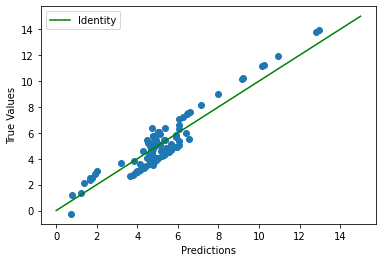

In [67]:
plt.scatter(svr_poly_prediction, y1_train)
plt.plot(np.arange(0,16),np.arange(0,16), 'g', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'MSE: {svr_poly_mse:.6f}')

In [68]:
results_df = results_df.append({'Model':'SVR Polynomial',
                                'MSE':svr_poly_mse},ignore_index=True)

In [52]:
results_df

,Model,MSE
0,Linear Classic,3.481445
1,Linear Polynomial Features,0.525270
2,SVR Linear,0.574032
3,SVR Polynomial,0.697387


In [42]:
# Uso el dataset de test para predecir las los valores.
y_pred_test3 = gs.best_estimator_.predict(df_test)
y_pred_test3

array([3.33401181, 3.34121545, 7.66287572, 5.13365629, 5.26006932,
       3.41022722, 6.96377566, 0.08464574, 9.4221957 , 5.25342106,
       5.21500279, 3.36295688, 9.58826316, 2.02970181, 4.17734231,
       5.78787146, 3.93650109, 3.3487225 , 3.89305857, 3.33869411])